Αφροδίτη Αβραμίδου, ΑΕΜ: 10329

Αθηνά Αποστολίδου,   ΑΕΜ: 10400




##ΜΕΡΟΣ Α


Theta1_hat: 2.585170340681362
Theta2_hat: -3.1462925851703414


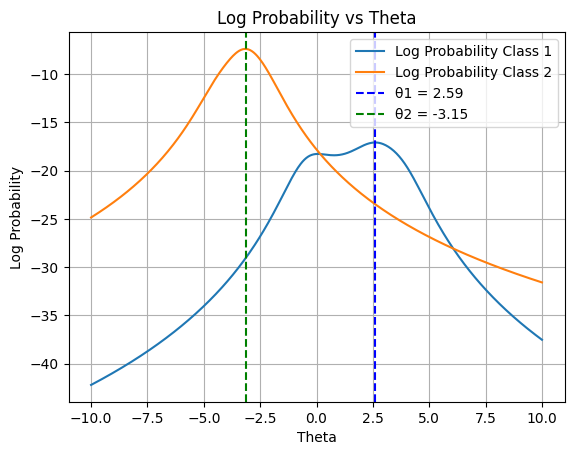

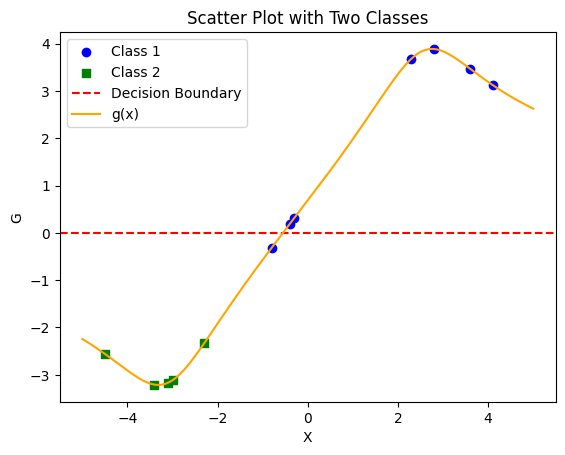

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]
theta = np.linspace(-10, 10, 500)
Pw1 = 7/12
Pw2 = 5/12

def prob_dens_func(x, theta):
    return (1 / np.pi) * (1 / (1 + (x - theta)**2))

def p_D_th(D, prob_dens_func, theta):
    p_D_th = 1
    for x in D:
        p_D_th *= prob_dens_func(x, theta)
    return p_D_th

def log_p_th(p_D_th, D, prob_dens_function, theta):
    return np.log(p_D_th(D, prob_dens_function, theta))

#Η κλάση ταξινομήτης
class Classifier:
    def __init__(self, D1, D2, theta):
        self.D1 = D1
        self.D2 = D2
        self.theta = theta

    def fit(self):
        theta_hat = [0, 0]
        y1 = log_p_th(p_D_th, self.D1, prob_dens_func, self.theta)
        y2 = log_p_th(p_D_th, self.D2, prob_dens_func, self.theta)
        theta_hat[0] = self.theta[np.argmax(y1)]
        theta_hat[1] = self.theta[np.argmax(y2)]
        return theta_hat
    #Η συνάρτηση που κατηγοριοποιεί τα δυο σύνολα
    def predict(self, Pw1, Pw2):
        theta_hat = self.fit()
        g1 = []
        g2 = []

        for x in self.D1:
            g1.append(
                np.log(prob_dens_func(x, theta_hat[0]))
                - np.log(prob_dens_func(x, theta_hat[1]))
                + np.log(Pw1)
                - np.log(Pw2)
            )

        for x in self.D2:
            g2.append(
                np.log(prob_dens_func(x, theta_hat[0]))
                - np.log(prob_dens_func(x, theta_hat[1]))
                + np.log(Pw1)
                - np.log(Pw2)
            )

        return np.array(g1), np.array(g2)

# Ορίζω τον ταξινομητή
clc = Classifier(D1, D2, theta)

# Plot log probability vs theta
y1 = log_p_th(p_D_th, D1, prob_dens_func, theta)
y2 = log_p_th(p_D_th, D2, prob_dens_func, theta)


# Επιλέγω τα θ που μεγιστοποιούν την παράσταση
theta1_hat = theta[np.argmax(y1)]
theta2_hat = theta[np.argmax(y2)]
print(f"Theta1_hat: {theta1_hat}")
print(f"Theta2_hat: {theta2_hat}")



#Τα γραφήματα συναρτήσει του θ
plt.plot(theta, y1, label="Log Probability Class 1")
plt.plot(theta, y2, label="Log Probability Class 2")
plt.axvline(x=theta1_hat, color="blue", linestyle="--", label=f"θ1 = {theta1_hat:.2f}")
plt.axvline(x=theta2_hat, color="green", linestyle="--", label=f"θ2 = {theta2_hat:.2f}")
plt.xlabel("Theta")
plt.ylabel("Log Probability")
plt.title("Log Probability vs Theta")
plt.legend()
plt.grid(True)
plt.show()



#
g1, g2 = clc.predict(Pw1, Pw2)

x_values = np.linspace(-5, 5, 500)
g_values = []

for x in x_values:
    g_values.append(
        np.log(prob_dens_func(x, theta1_hat))
        - np.log(prob_dens_func(x, theta2_hat))
        + np.log(Pw1)
        - np.log(Pw2)
    )


plt.scatter(D1, g1, color='blue', marker='o', label='Class 1')
plt.scatter(D2, g2, color='green', marker='s', label='Class 2')
plt.axhline(y=0, color="red", linestyle="--", label="Decision Boundary")
plt.plot(x_values, g_values, label='g(x)', color='orange')

plt.xlabel('X')
plt.ylabel('G')
plt.legend()
plt.title('Scatter Plot with Two Classes')
plt.show()


Στο Α μέρος της εργασίας υλοποιήθηκε η κλάση Classifier η οποία αποτελείται απο μια συνάρτη fit που υπολογίζει τις παραμέτρους θ1_hat και θ2_hat και μια συνάρτηση predict που επιστρέφει την τιμή της συνάρτησης διάκρησης.

1.  Οι συναρτήσεις πιθανοφάνειας μεγιστοποιούνται για θ1_hat = 2.5851 και θ2_hat = -3.1462.

2.  Οι εκτιμήσεις θ1_hat και θ2_hat αντικαθιστούν τις πραγματικές παραμέτρους στις πιθανότητες P(x∣ω1)και P(x∣ω2).
Δίνεται η συνάρτηση διάκρισης:

   g(x) = log P (x|θ1_hat) − log P (x|θ2_hat) + log P (ω1) − log P (ω2)=

   log P (x|θ1_hat) − log P (x|θ2_hat) + log P (ω1) − log P (ω2)- log(P(x))+log(P(x))=

  log(P(x∣ω1) * P (ω1)/P(x)) - log(P(x∣ω2) * P (ω2)/P(x)) =

  log(P(ω1|x))-log(P(ω2|x))

 Η σχέση log(P(ω1|x))-log(P(ω2|x)) περιγράφει τη διαφορά στους λογαρίθμους των a posteriori πιθανοτήτων των κατηγοριών ω1​ και ω2 για ένα δεδομένο x. Το πρόσημο της g(x) καθόριζει έτσι σε ποιά κλάση ταξινομείται το στοιχείο.
  Αν g(x)>0 σημαίνει ότι η a posteriori πιθανότητα να βρίσκεται στην κλάση ω1 είναι μεγαλύτερη από το να βρίσκεται στην κλάση ω2 και επομένως το στοιχείο ταξινομείται σαν ω1.
Αν g(x)<0 σημαίνει ότι η a posteriori πιθανότητα να βρίσκεται στην κλάση ω2 είναι μεγαλύτερη από το να βρίσκεται στην κλάση ω1 και επομένως το στοιχείο ταξινομείται σαν ω2.
Επομένως, όριο απόφασης είναι η συνάρτηση g(x)=0.

 Με βάση αυτόν τον κανόνα απόφασης όλα τα στοιχεία θα ταξινομηθούν σωστά εκτός από ένα που ενώ ανήκει στην κλάση 1 η τιμή που δίνει στην συνάρτηση διάκρισης είναι λίγο κάτω από το 0 οπότε ταξινομείται στην κλάση 2.
Επίσης, βλέπουμε ότι 3 από τα στοιχεία την κλάσης 1 βρίσκονται πολύ κοντά στο όριο απόφασης πράγμα που μπορεί να δημιουργήσει σφάλμα στην ταξινόμηση.











## ΜΕΡΟΣ Β

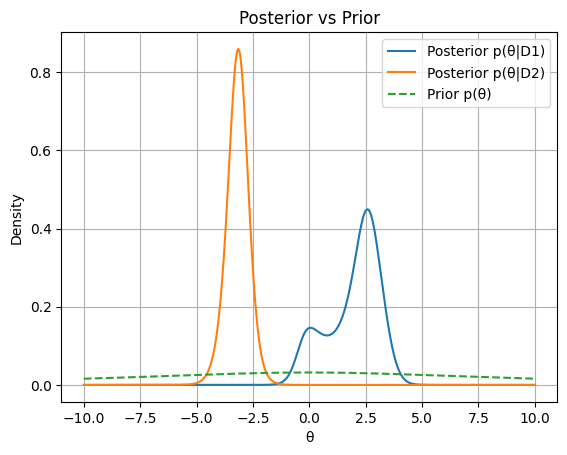

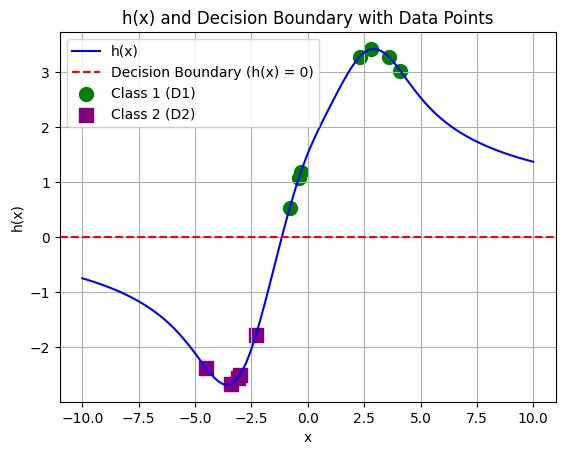

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]
theta = np.linspace(-10, 10, 500)
Pw1 = 7 / 12
Pw2 = 5 / 12

# εκ των προτέρων πυκνότητα πιθανότητας
def prior_theta(theta):
    return (1 / (10 * np.pi)) * (1 / (1 + (theta / 10) ** 2))

# Συνάρτηση πυκνότητας πιθανότητας
def prob_dens_func(x, theta):
    return (1 / np.pi) * (1 / (1 + (x - theta) ** 2))

# Εκ των υστέρων πιθανότητα p(θ|D)
def posterior_theta(D, theta):
    likelihood = np.prod([prob_dens_func(x, theta) for x in D], axis=0)
    prior = prior_theta(theta)
    posterior = likelihood * prior
    posterior /= np.trapz(posterior, theta)  # υπολογισμός της p(θ|D) με τον κανόνα τραπεζίου
    return posterior

def decision_function(x, D1, D2, theta, Pw1, Pw2):
    posterior_D1 = posterior_theta(D1, theta)
    posterior_D2 = posterior_theta(D2, theta)

    # Υπολογισμός p(x|D1) και p(x|D2) με βάση την εκ των υστέρων πυκνότητα πιθανότητας
    px_D1 = np.trapz(prob_dens_func(x, theta) * posterior_D1, theta)
    px_D2 = np.trapz(prob_dens_func(x, theta) * posterior_D2, theta)

    # Συνάρτηση διάκρισης
    h_x = np.log(px_D1) - np.log(px_D2) + np.log(Pw1) - np.log(Pw2)
    return h_x

# Απεικόνιση των εκ των υστέρων πιθανοτήτων p(θ|D1) και p(θ|D2)
posterior_D1 = posterior_theta(D1, theta)
posterior_D2 = posterior_theta(D2, theta)

plt.plot(theta, posterior_D1, label="Posterior p(θ|D1)")
plt.plot(theta, posterior_D2, label="Posterior p(θ|D2)")
plt.plot(theta, prior_theta(theta), label="Prior p(θ)", linestyle="--")
plt.xlabel("θ")
plt.ylabel("Density")
plt.title("Posterior vs Prior")
plt.legend()
plt.grid(True)
plt.show()

# Απεικόνιση της συνάρτησης διάκρισης h(x)
x_values = np.linspace(-10, 10, 100)
h_values = [decision_function(x, D1, D2, theta, Pw1, Pw2) for x in x_values]

plt.plot(x_values, h_values, label="h(x)", color="blue")

# όριο απόφασης h(x) = 0
plt.axhline(0, color="red", linestyle="--", label="Decision Boundary (h(x) = 0)")

# Απεικόνιση των δεδομένων D1 και D2
plt.scatter(D1, [decision_function(x, D1, D2, theta, Pw1, Pw2) for x in D1], color="green", label="Class 1 (D1)", marker="o", s=100)
plt.scatter(D2, [decision_function(x, D1, D2, theta, Pw1, Pw2) for x in D2], color="purple", label="Class 2 (D2)", marker="s", s=100)

plt.xlabel("x")
plt.ylabel("h(x)")
plt.title("h(x) and Decision Boundary with Data Points")
plt.legend()
plt.grid(True)
plt.show()

Σύγκριση εκ των υστέρων πιθανοτήτων p(θ|D1) και p(θ|D2) σε σχέση με την prior p(θ):

Από το κοινό διάγραμμα στο οποίο απεικονίζονται οι καμπύλες των παραπάνω πιθανοτήτων, παρατηρούμε ότι η καμπύλη της εκ prior πιθανότητας p(θ) είναι σχετικά επίπεδη και πλατιά, υποδεικνύοντας αρκετά μεγάλη αβεβαιότητα για την τιμή του θ πριν την παρατήρηση οποιωνδήποτε δεδομένων.
 Αφού συμπεριλάβουμε την παρατήρηση των συνόλων δεδομένων D1 και D2, παρατηρούμε ότι οι εκ των υστέρων πιθανότητες  p(θ∣D1) and p(θ∣D2) παρουσιάζουν σημαντικά πιο έντονες κορυφές γύρω από την πραγματική τιμή του θ. Το γεγονός αυτό δείχνει ότι η γνώση των D1 και D2 είναι μία σημαντική πληροφορία που υποδεικνύει ότι το θ είναι πιο πιθανό να βρίσκεται εντός συγκεκριμένων ορίων. Έτσι με την εκτίμηση Bayes μειώνεται η αβεβαιότητα με την συμπερίληψη εκ των προτέρων γνώσης για δεδομένα που έχουν παρατηρηθεί.




Παρατηρήσεις για τις τιμές της συνάρτησης διάκρισης h(x) σε σχέση με τα σύνολα δεδομένων D1, D2:

Για  την συνάρτηση διάκρισης h(x) = log P(x|D1) − log P(x|D2) + log P(ω1) − log P(ω2), μπορούμε να διακρίνουμε 2 περιοχές, μία με θετικές και μία με αρνητικές τιμές ενώ το όριο απόφασης h(x) = 0 φαίνεται με την κόκκινη διακεκομμένη γραμμή στο δεύτερο διάγραμμα.
Παρατηρούμε ότι το όριο απόφασης διαχωρίζει πλήρως τις 2 κλάσεις, με τα δείγματα D1 της κλάσης 1 να βρίσκεται πάνω από αυτό, ενώ τα δείγματα D2 της κλάσης 2 βρίσκονται από κάτω.
Έτσι με την συνάρτηση βασισμένη στις posterior πιθανότητες P(x|D1) και P(x|D2), είναι σαφής ο διαχωρισμός των 2 κλάσεων από το όριο απόφασης.
 Η συνάρτηση απόφασης είναι μη γραμμική, αντικατοπτρίζοντας την επίδραση της prior πιθανότητας p(θ) και της posterior P(x|D).



Σύγκριση προσέγγισης του προβλήματος με Bayesian Εκτίμηση σε σχέση με Εκτίμηση Μέγιστης Πιθανοφάνειας:

Ο Εκτιμητής Μέγιστης Πιθανοφάνειας (MLE) μεγιστοποιεί απευθείας την πιθανότητα p(D∣θ) χωρίς να λαμβάνει υπόψιν του την prior p(θ). Αντίθετα η Bayesian προσέγγιση αξιοποιεί την p(θ) σε συνδυασμό με την συνάρτηση πιθανοφάνειας p(D|θ) για να καταλήξει στην posterior p(θ|D). Έτσι λαμβάνεται υπόψιν η αβεβαιότητα της παραμέτρου θ σε αντίθεση με την περίπτωση του MLE όπου το θ αντιμετωπίζεται ως παράμετρος με σταθερή τιμή αγνοώντας την μεταβλητότητά του.
Επομένως μπορούμε να πούμε ότι η εκτίμηση κατά Bayes είναι προτιμότερη στην περίπτωσή μας λόγω του περιορισμένου μεγέθους των συνόλων δεδομένων D1 και D2  και της διαθεσιμότητας εκ των προτέρων πληροφορίας. Έτσι παρέχει ένα όριο απόφασης που λαμβάνει υπόψιν του περισσότερη πληροφορία.
H εκτίμηση μέγιστης πιθανοφάνειας αν και πιο απλή, μπορεί να αποτύχει στην γενίκευση όταν τα δεδομένα είναι περιορισμένα ή θορυβώδη, καθώς δεν αξιοποιεί την εκ των προτέρων γνώση ούτε λαμβάνει υπόψη την αβεβαιότητα στην εκτίμηση των παραμέτρων.




##ΜΕΡΟΣ Γ


Καλύτερο βάθος δέντρου: 5, με ποσοστό σωστής ταξινόμησης: 69.33%


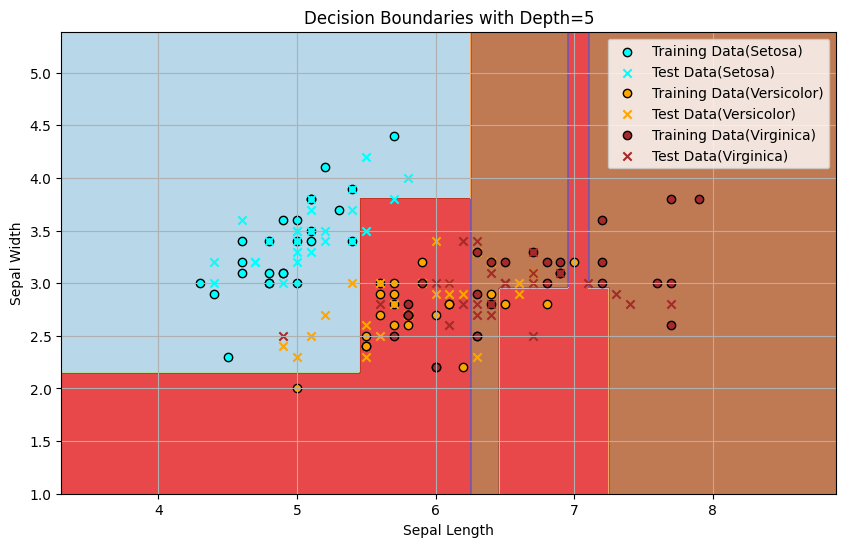

Καλύτερο βάθος δέντρου (Random Forest): 6, Ποσοστό σωστής ταξινόμησης: 72.00%


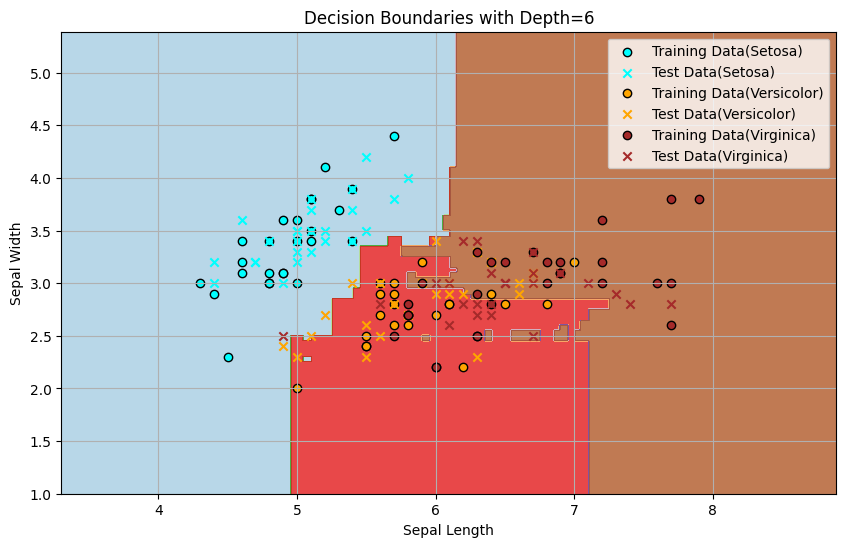

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# η Ενότητα: DecisionTreeClassifier για ταξινόμηση των φυτών του Iris dataset

# Φόρτωση δεδομένων του Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Χρησιμοποιούμε μόνο τα 2 πρώτα χαρακτηριστικά του dataset
y = iris.target

# Χωρισμός σε σύνολα εκπαίδευσης και δοκιμής (50% - 50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)# Η παράμετρος stratify=y εξασφάλιζει την διατήρηση της αναλογίας των δεδομένων των τριων κλάσεων

depths = range(1, 10)  # Εξετάζουμε βάθη από 1 έως 10
best_depth = None
best_accuracy = 0
accuracies = []

# Δοκιμή για διάφορα βάθη δέντρου
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

    #print(f"Βάθος: {depth}, Test Accuracy: {acc * 100:.2f}%")

print(f"Καλύτερο βάθος δέντρου: {best_depth}, με ποσοστό σωστής ταξινόμησης: {best_accuracy * 100:.2f}%")

# Εκπαίδευση με το βέλτιστο βάθος
clf = DecisionTreeClassifier(max_depth=best_depth)
clf.fit(X_train, y_train)

# Απεικόνιση ορίων απόφασης
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1     # καθορισμός των ορίων του grid
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  # δημιουργία 2d grid από 2 μονοδιάστατους πίνακες

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # ο classifier προβλέπει την κατηγορία κάθε σημείου του grid
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Απεικόνιση των training και test data ανά κατηγορία
categories = ['Setosa', 'Versicolor', 'Virginica']
colors = ['cyan', 'orange', 'brown']

for i, category in enumerate(categories):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f"Training Data({category})", edgecolor="k", color=colors[i])
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f"Test Data({category})", marker="x", color=colors[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title(f"Decision Boundaries with Depth={best_depth}")
plt.legend()
plt.grid(True)
plt.show()



# 2η Ενότητα: Random Forest με Bootstrap
accuracies_rf = []

for depth in depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, bootstrap=True, max_samples=0.5, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracies_rf.append(accuracy_rf)

# Βρίσκουμε το καλύτερο βάθος για Random Forest
best_depth_rf = depths[np.argmax(accuracies_rf)]
best_accuracy_rf = max(accuracies_rf)

print(f"Καλύτερο βάθος δέντρου (Random Forest): {best_depth_rf}, Ποσοστό σωστής ταξινόμησης: {best_accuracy_rf * 100:.2f}%")

# Εκπαίδευση Random Forest με το καλύτερο βάθος
rf_best = RandomForestClassifier(n_estimators=100, max_depth=best_depth_rf, bootstrap=True, max_samples=0.5, random_state=42)
rf_best.fit(X_train, y_train)


# Σχεδίαση ορίων απόφασης για Random Forest
#plot_decision_boundaries(X_train, y_train, rf_best, "Όρια Απόφασης Random Forest")

# Απεικόνιση ορίων απόφασης
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1     # καθορισμός των ορίων του grid
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  # δημιουργία 2d grid από 2 μονοδιάστατους πίνακες

Z = rf_best.predict(np.c_[xx.ravel(), yy.ravel()])  # ο classifier προβλέπει την κατηγορία κάθε σημείου του grid
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Απεικόνιση των training και test data ανά κατηγορία
categories = ['Setosa', 'Versicolor', 'Virginica']
colors = ['cyan', 'orange', 'brown']

for i, category in enumerate(categories):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f"Training Data({category})", edgecolor="k", color=colors[i])
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f"Test Data({category})", marker="x", color=colors[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title(f"Decision Boundaries with Depth={best_depth_rf}")
plt.legend()
plt.grid(True)
plt.show()

##ΜΕΡΟΣ Γ##
2) Ο αλγόριθμος Random Forest Classifier παρουσιάζει καλύτερη ακρίβεια απο τον απλό DecisionTree ταξινομητή. Αυτό συμβαίνει επειδή ο Random Forest συνδυάζει πολλαπλά δέντρα, καθένα από τα οποία εκπαιδεύεται σε διαφορετικό τυχαίο υποσύνολο των δεδομένων (bootstrapping) και χρησιμοποιεί τυχαίο υποσύνολο χαρακτηριστικών για κάθε split. Τέλος, ο Random Forest Classifier είναι μια τεχνική ensemble learning, όπου η τελική απόφαση λαμβάνεται με συνδυασμό των επιμέρους προβλέψεων.

3) Τα αποτελέσματα για διαφορετικές τιμές γ ήταν τα εξής:
  
   γ=0.1 παίρνει 69.33% για μέγιστο βάθος 3

   γ=0.3 παίρνει 72% για μέγιστο βάθος 5

   γ=0.5 παίρνει 72% για μέγιστο βάθος 5

   γ=0.7 παίρνει 70.67% για μέγιστο βάθος 8

   γ=0.95 παίρνει 72% για μέγιστο βάθος 3

   Περιμένουμε πως όσο μεγαλώνει το γ να αυξάνει και η ακρίβεια καθώς γίνεται bootstrap σε μεγαλύτερο ποσοστό οπότε η επαναδειγματοληψια γίνεται με περισσότερα δεδομένα. Στο πείραμα παραπάνω αυτό δεν φαίνεται τόσο έντονα πιθανότατα λόγω των σχετικά λίγων δεδομένων. Παρόλα αυτά όσο αυξάνουμε το γ τόσο πιθανότερο να έχουμε overfitting. Η υποδειγματοληψία που επιτυγχάνεται με την παράμετρο γ οδήγει κάθε δέντρο να εκπαιδεύεται βλέποντας διαφορετικό κομμάτι από τα δεδομένα πράγμα που μειώνει την διακύμανση στο τελικό μοντέλο.
